# Decision Tree Learning with Visualization

by Christof Renner (22301943)
and Manuel Friedl (12306626)
and Felix Hahl (22302429)

This documentation provides an overview of the decision tree learning algorithm implemented in the given code, including the calculation of attribute importance, the learning algorithm, and visualization of the decision tree.

## Importing Necessary Libraries

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.preprocessing import LabelEncoder
```

## Function Definitions

### Plurality Value

```python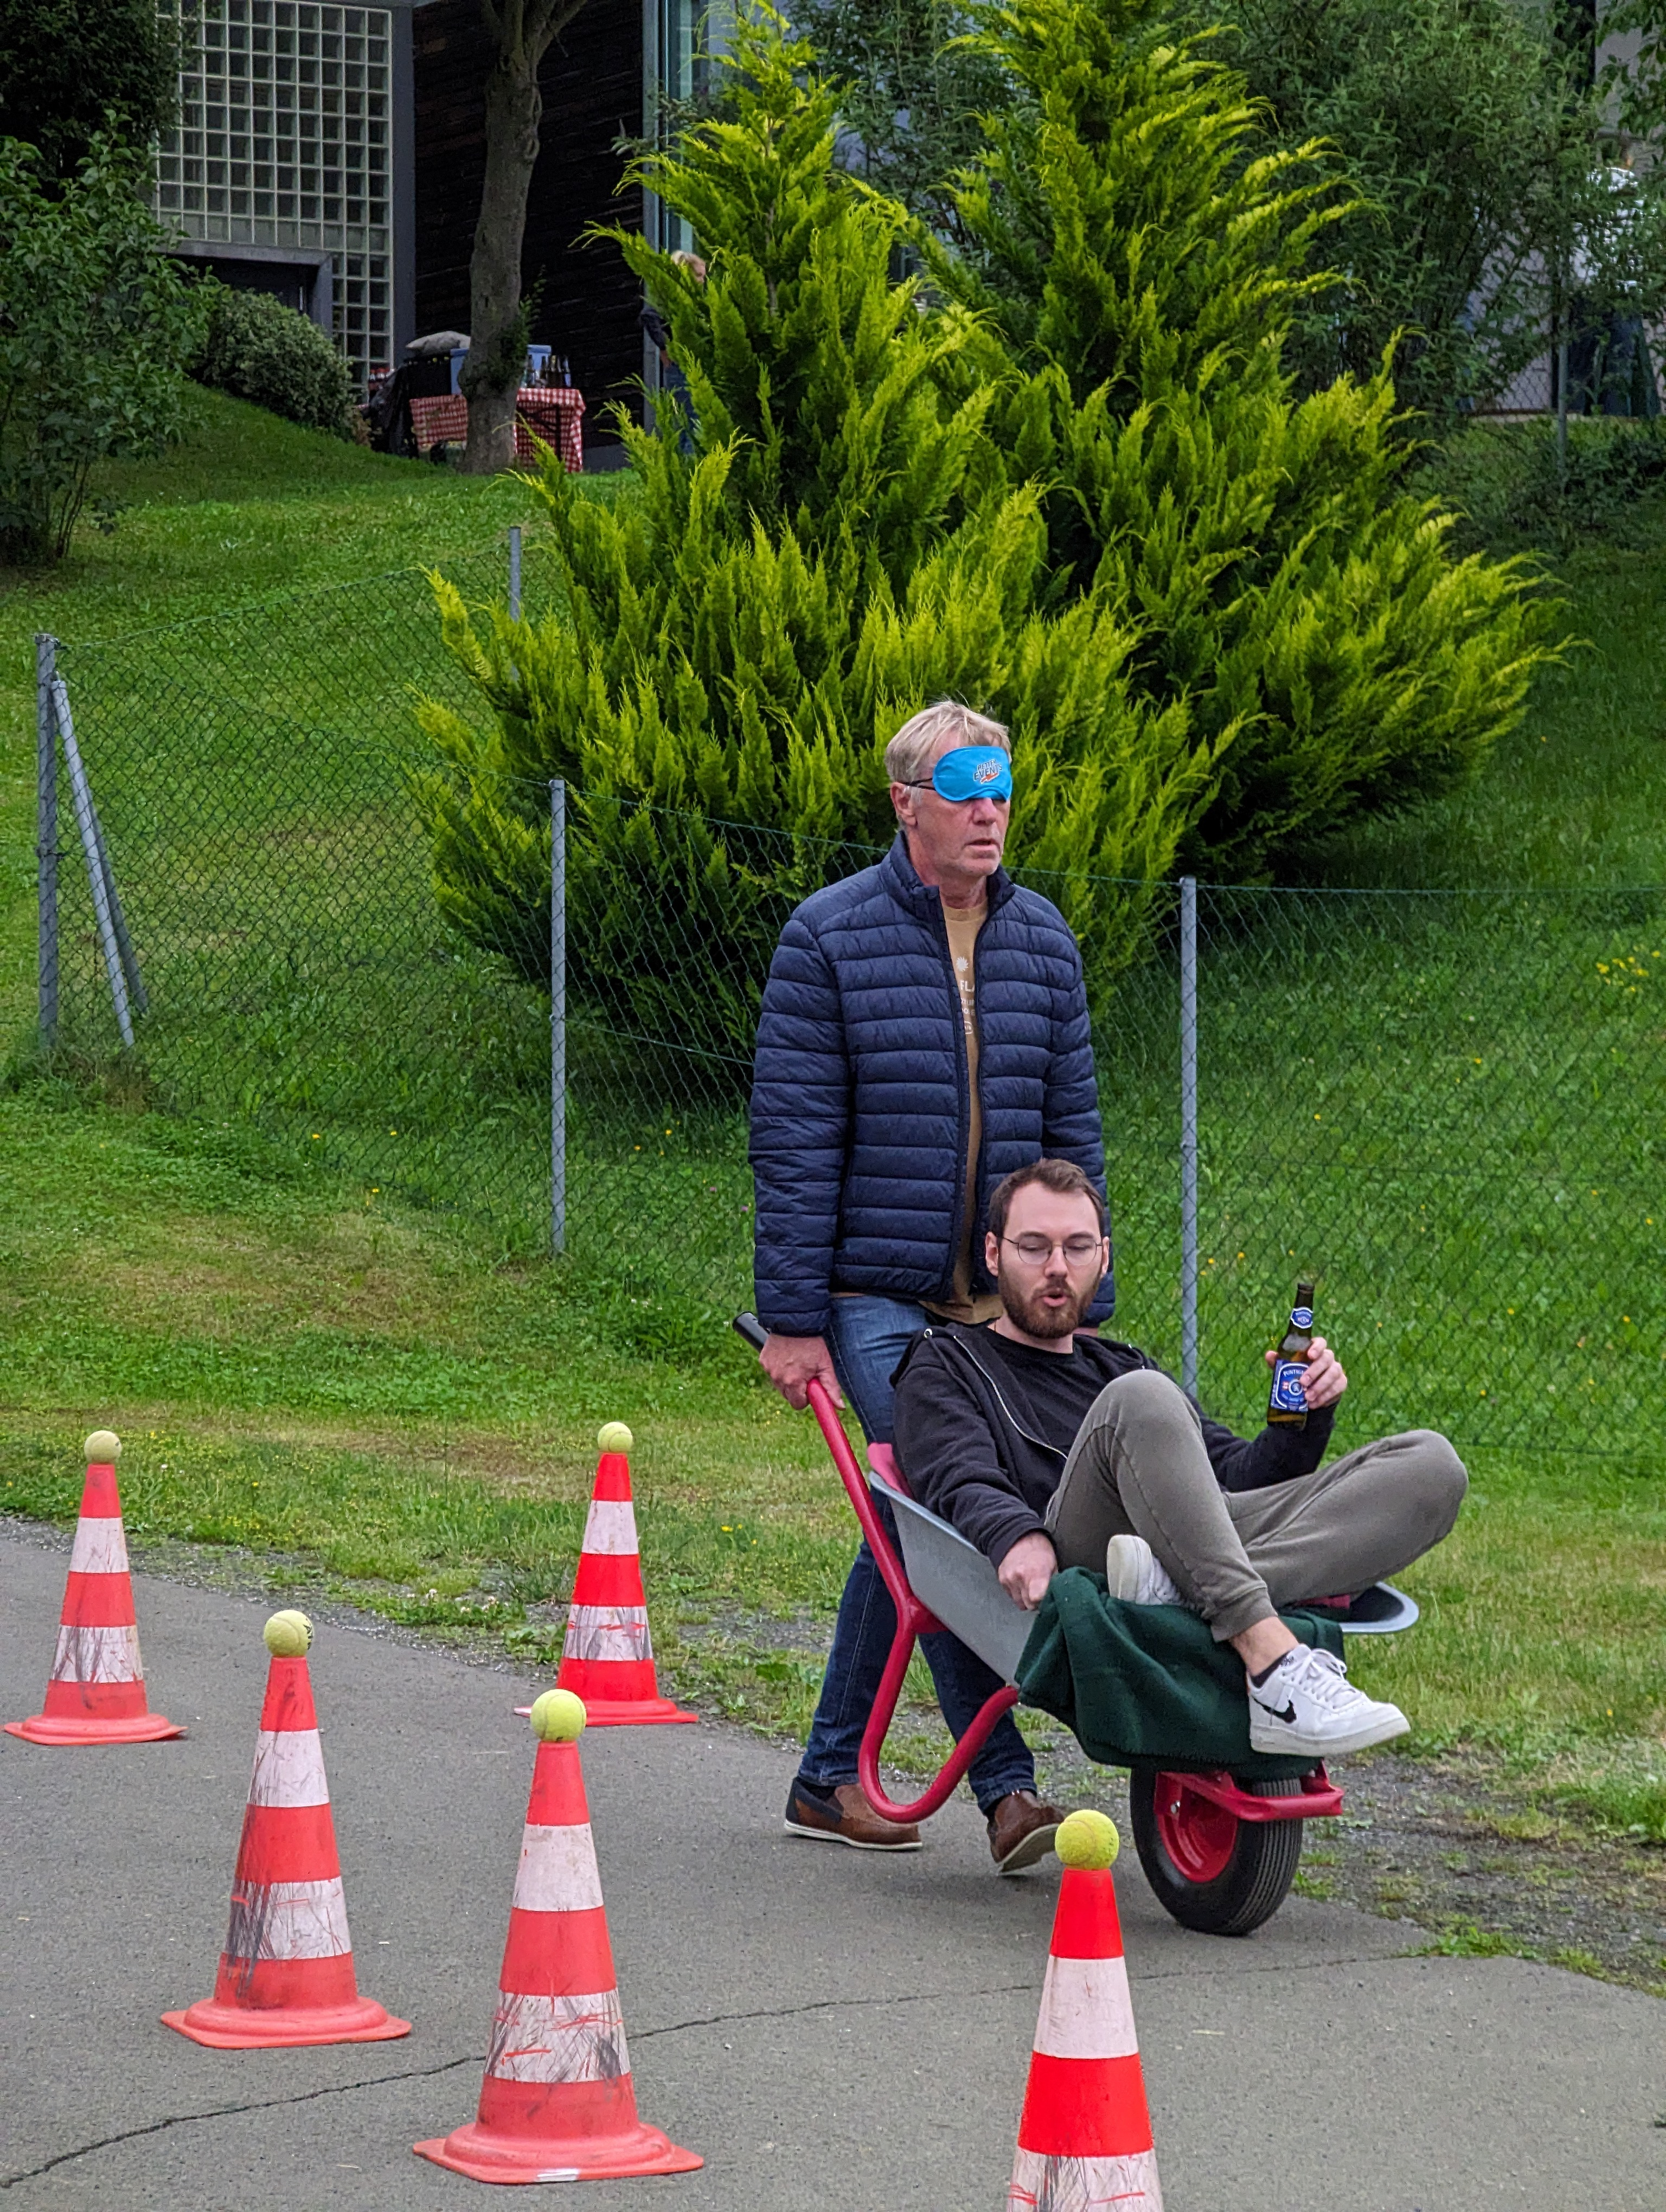
def plurality_val(examples):
    """
    Returns the most common output value among a set of examples.
    """
    values, counts = np.unique([example[-1] for example in examples], return_counts=True)
    return values[np.argmax(counts)]
```

This function returns the most common output value among a set of examples.

### Attribute Importance

```python
def importance(attribute, examples):
    """
    Calculate the importance of an attribute (Information Gain).
    """
    def entropy(examples):
        values, counts = np.unique([example[-1] for example in examples], return_counts=True)
        probs = counts / counts.sum()
        return -np.sum(probs * np.log2(probs))
    
    entropy_before = entropy(examples)
    values, counts = np.unique([example[attribute] for example in examples], return_counts=True)
    weighted_entropy_after = sum((counts[i] / counts.sum()) * entropy([example for example in examples if example[attribute] == values[i]]) for i in range(len(values)))
    
    information_gain = entropy_before - weighted_entropy_after
    print(f"Attribute: {attribute}, Information Gain: {information_gain:.4f}")
    
    return information_gain
```

This function calculates the importance of an attribute using Information Gain. It computes the entropy before and after splitting the examples by the attribute and then calculates the information gain.

### Decision Tree Learning

```python
def dt_learning(examples, attributes, parent_examples=None):
    """
    Decision tree learning algorithm with debugging information.
    """
    if examples == []:
        return plurality_val(parent_examples)
    elif all(example[-1] == examples[0][-1] for example in examples):
        return examples[0][-1]
    elif not attributes:
        return plurality_val(examples)
    else:
        best_attribute = max(attributes, key=lambda attr: importance(attr, examples))
        print(f"Best attribute selected: {best_attribute}")
        tree = {best_attribute: {}}
        for value in [0, 1]:
            exs = [example for example in examples if example[best_attribute] == value]
            print(f"Subtree for attribute {best_attribute} = {value}: {len(exs)} examples")
            subtree = dt_learning(exs, [attr for attr in attributes if attr != best_attribute], examples)
            tree[best_attribute][value] = subtree
        return tree
```

This function implements the decision tree learning algorithm with debugging information. It recursively selects the best attribute, splits the examples, and builds subtrees.

### Plotting the Decision Tree

```python
def plot_tree(tree, feature_names, class_names):
    """
    Plot the decision tree using networkx and matplotlib.
    """
    def add_edges(tree, graph, parent=None, label='', depth=0, pos={}, level_widths=None):
        if level_widths is None:
            level_widths = {}
        if isinstance(tree, dict):
            for attribute, branches in tree.items():
                node_label = feature_names[attribute]
                node_name = f"{node_label}\n(Attribute {attribute})"
                if node_name not in pos:
                    width = level_widths.get(depth, 0)
                    pos[node_name] = (width, -depth)
                    level_widths[depth] = width + 1
                graph.add_node(node_name)
                if parent:
                    graph.add_edge(parent, node_name, label=label)
                for value, subtree in branches.items():
                    add_edges(subtree, graph, node_name, str(value), depth + 1, pos, level_widths)
        else:
            class_name = class_names[tree]
            leaf_name = f"Class: {class_name}"
            if leaf_name not in pos:
                width = level_widths.get(depth, 0)
                pos[leaf_name] = (width, -depth)
                level_widths[depth] = width + 1
            graph.add_node(leaf_name)
            if parent:
                graph.add_edge(parent, leaf_name, label=label)
        return pos, level_widths

    graph = nx.DiGraph()
    pos, level_widths = add_edges(tree, graph)

    x_positions = [pos[node][0] for node in pos]
    y_positions = [pos[node][1] for node in pos]
    width_range = max(x_positions) - min(x_positions)
    height_range = max(y_positions) - min(y_positions)
    pos = {node: ((x - min(x_positions)) / width_range, (y - min(y_positions)) / height_range) for node, (x, y) in pos.items()}

    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrows=False)
    edge_labels = nx.get_edge_attributes(graph, 'label')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='red')
    plt.show()
```

This function plots the decision tree using NetworkX and Matplotlib. It recursively adds nodes and edges to the graph and adjusts their positions for visualisation.

## Main Code

The main part of the code initialises a dataset, encodes the categorical variables, trains the decision tree, and plots it.

```python
if __name__ == "__main__":
    # Dataset
    data = [
        ['high', 'none', 'normal', 'low', 'weak', 'False'],
        ['low', 'strong', 'high', 'middle', 'strong', 'True'],
        ['middle', 'none', 'high', 'middle', 'weak', 'True'],
        ['low', 'strong', 'high', 'strong', 'strong',  'True'],
        ['low', 'strong', 'normal', 'high', 'weak', 'True'],
        ['middle', 'none', 'high', 'middle', 'weak', 'True'],
        ['high', 'none', 'normal', 'low', 'weak', 'False'],
        ['middle', 'none', 'high', 'middle', 'weak', 'True'],
        ['high', 'strong', 'normal', 'high', 'weak', 'True'],
        ['low', 'strong', 'normal', 'middle', 'weak', 'True'],
        ['high', 'none', 'normal', 'middle', 'strong', 'False'],
        ['middle', 'strong', 'high', 'middle', 'strong', 'True'],
        ['low', 'none', 'normal', 'middle', 'weak', 'False'],
        ['high', 'none', 'high', 'high', 'weak', 'False'],
        ['low', 'none', 'normal', 'low', 'weak', 'False'],
        ['middle', 'none', 'high', 'middle', 'weak', 'True'],
        ['low', 'strong', 'high', 'strong', 'strong', 'True'],
        ['high', 'weak', 'normal', 'low', 'weak', 'False'],
    ]
    
    columns = ['temperature', 'wind', 'probability_rain', 'humid', 'water', 'take_umbrella']
    df = pd.DataFrame(data, columns=columns)
    
    le = LabelEncoder()
    for col in df.columns:
        df[col] = le.fit_transform(df[col])

    examples = df.values.tolist()
    
    attributes = list(range(df.shape[1] - 1))
    tree = dt_learning(examples, attributes)
    print(tree)
    
    feature_names = columns[:-1]
    class_names = le.classes_
    plot_tree(tree, feature_names, class_names)
```

## Output

Besides plotting the graph itself, additional ouput about the calculated information gain is displayed in the console the program is currently running in. This helps understanding the plotted graph and the aids in debugging potentially unwanted/incorrect plots. 

```bash

Attribute: 0, Information Gain: 0.4117
Attribute: 1, Information Gain: 0.4247
Attribute: 2, Information Gain: 0.2533
Attribute: 3, Information Gain: 0.4289
Attribute: 4, Information Gain: 0.0444
Best attribute selected: 3
Subtree for attribute 3 = 0: 3 examples
Attribute: 0, Information Gain: 0.2516
Attribute: 1, Information Gain: 0.9183
Attribute: 2, Information Gain: 0.9183
Attribute: 4, Information Gain: 0.0000
Best attribute selected: 1
Subtree for attribute 1 = 0: 1 examples
Subtree for attribute 1 = 1: 2 examples
Subtree for attribute 3 = 1: 4 examples
{3: {0: {1: {0: 0, 1: 1}}, 1: 0}}

```


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.preprocessing import LabelEncoder

def plurality_val(examples):
    """
    Returns the most common output value among a set of examples.
    """
    values, counts = np.unique([example[-1] for example in examples], return_counts=True)
    return values[np.argmax(counts)]

def importance(attribute, examples):
    """
    Calculate the importance of an attribute (Information Gain).
    """
    def entropy(examples):
        values, counts = np.unique([example[-1] for example in examples], return_counts=True)
        probs = counts / counts.sum()
        return -np.sum(probs * np.log2(probs))
    
    entropy_before = entropy(examples)
    values, counts = np.unique([example[attribute] for example in examples], return_counts=True)
    weighted_entropy_after = sum((counts[i] / counts.sum()) * entropy([example for example in examples if example[attribute] == values[i]]) for i in range(len(values)))
    
    information_gain = entropy_before - weighted_entropy_after
    print(f"Attribute: {attribute}, Information Gain: {information_gain:.4f}")
    
    return information_gain

def dt_learning(examples, attributes, parent_examples=None):
    """
    Decision tree learning algorithm with debugging information.
    """
    if examples == []:
        return plurality_val(parent_examples)
    elif all(example[-1] == examples[0][-1] for example in examples):
        return examples[0][-1]
    elif not attributes:
        return plurality_val(examples)
    else:
        best_attribute = max(attributes, key=lambda attr: importance(attr, examples))
        print(f"Best attribute selected: {best_attribute}")
        tree = {best_attribute: {}}
        for value in [0, 1]:
            exs = [example for example in examples if example[best_attribute] == value]
            print(f"Subtree for attribute {best_attribute} = {value}: {len(exs)} examples")
            subtree = dt_learning(exs, [attr for attr in attributes if attr != best_attribute], examples)
            tree[best_attribute][value] = subtree
        return tree

def plot_tree(tree, feature_names, class_names):
    """
    Plot the decision tree using networkx and matplotlib.
    """
    def add_edges(tree, graph, parent=None, label='', depth=0, pos={}, level_widths=None):
        if level_widths is None:
            level_widths = {}
        if isinstance(tree, dict):
            for attribute, branches in tree.items():
                node_label = feature_names[attribute]
                node_name = f"{node_label}\n(Attribute {attribute})"
                if node_name not in pos:
                    width = level_widths.get(depth, 0)
                    pos[node_name] = (width, -depth)
                    level_widths[depth] = width + 1
                graph.add_node(node_name)
                if parent:
                    graph.add_edge(parent, node_name, label=label)
                for value, subtree in branches.items():
                    add_edges(subtree, graph, node_name, str(value), depth + 1, pos, level_widths)
        else:
            class_name = class_names[tree]
            leaf_name = f"Class: {class_name}"
            if leaf_name not in pos:
                width = level_widths.get(depth, 0)
                pos[leaf_name] = (width, -depth)
                level_widths[depth] = width + 1
            graph.add_node(leaf_name)
            if parent:
                graph.add_edge(parent, leaf_name, label=label)
        return pos, level_widths

    graph = nx.DiGraph()
    pos, level_widths = add_edges(tree, graph)

    x_positions = [pos[node][0] for node in pos]
    y_positions = [pos[node][1] for node in pos]
    width_range = max(x_positions) - min(x_positions)
    height_range = max(y_positions) - min(y_positions)
    pos = {node: ((x - min(x_positions)) / width_range, (y - min(y_positions)) / height_range) for node, (x, y) in pos.items()}

    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrows=False)
    edge_labels = nx.get_edge_attributes(graph, 'label')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='red')
    plt.show()

if __name__ == "__main__":
    # Dataset
    data = [
        ['high', 'none', 'normal', 'low', 'weak', 'False'],
        ['low', 'strong', 'high', 'middle', 'strong', 'True'],
        ['middle', 'none', 'high', 'middle', 'weak', 'True'],
        ['low', 'strong', 'high', 'strong', 'strong',  'True'],
        ['low', 'strong', 'normal', 'high', 'weak', 'True'],
        ['middle', 'none', 'high', 'middle', 'weak', 'True'],
        ['high', 'none', 'normal', 'low', 'weak', 'False'],
        ['middle', 'none', 'high', 'middle', 'weak', 'True'],
        ['high', 'strong', 'normal', 'high', 'weak', 'True'],
        ['low', 'strong', 'normal', 'middle', 'weak', 'True'],
        ['high', 'none', 'normal', 'middle', 'strong', 'False'],
        ['middle', 'strong', 'high', 'middle', 'strong', 'True'],
        ['low', 'none', 'normal', 'middle', 'weak', 'False'],
        ['high', 'none', 'high', 'high', 'weak', 'False'],
        ['low', 'none', 'normal', 'low', 'weak', 'False'],
        ['middle', 'none', 'high', 'middle', 'weak', 'True'],
        ['low', 'strong', 'high', 'strong', 'strong', 'True'],
        ['high', 'weak', 'normal', 'low', 'weak', 'False'],
    ]
    
    columns = ['temperature', 'wind', 'probability_rain', 'humid', 'water', 'take_umbrella']
    df = pd.DataFrame(data, columns=columns)
    
    le = LabelEncoder()
    for col in df.columns:
        df[col] = le.fit_transform(df[col])

    examples = df.values.tolist()
    
    attributes = list(range(df.shape[1] - 1))
    tree = dt_learning(examples, attributes)
    print(tree)
    
    feature_names = columns[:-1]
    class_names = le.classes_
    plot_tree(tree, feature_names, class_names)